<a href="https://colab.research.google.com/github/HusnaKowsar/Employee-Promotion-Prediction/blob/main/Employee_Promotion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 To create a model which predicts whether a person will get
a promotion or not


In [ ]:
#import the all libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, i
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#LOAD THE DATASET
data = pd.read_csv("train.csv")
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0


ABOUT THE DATA


In [ ]:
data.shape


(54808, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


So the null values present in columns  are education,previous_year_rating

In [ ]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


There are no much outliers present in tha data bcz there is no much difference b/w mean
and 50 percentile


In [ ]:
data['is_promoted'].value_counts()  #Data is imbalanced bcz of less 0's and more 1's

0    50140
1     4668
Name: is_promoted, dtype: int64

HANDLING THE MISSING VALUES

In [ ]:
#CALCULATE % OF NULL VALUES
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
round(100*data.isnull().sum()/len(data.index))

employee_id             0.0
department              0.0
region                  0.0
education               4.0
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    8.0
length_of_service       0.0
awards_won?             0.0
avg_training_score      0.0
is_promoted             0.0
dtype: float64

In [ ]:
#Lets impute the null values with statistics

data['education']=data['education'].fillna(data['education'].mode()[0])

# Lets impute for previous_year_rating
data['previous_year_rating']=data['previous_year_rating'].fillna(data['previous_year_rating'].mode()[0])

In [ ]:
data['education'].value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [ ]:
data['previous_year_rating'].value_counts()

3.0    22742
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [ ]:
print(len(data['education']))

54808


In [ ]:
#check whether all the null values are imputed or not
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

There are no null values then go for the outliers

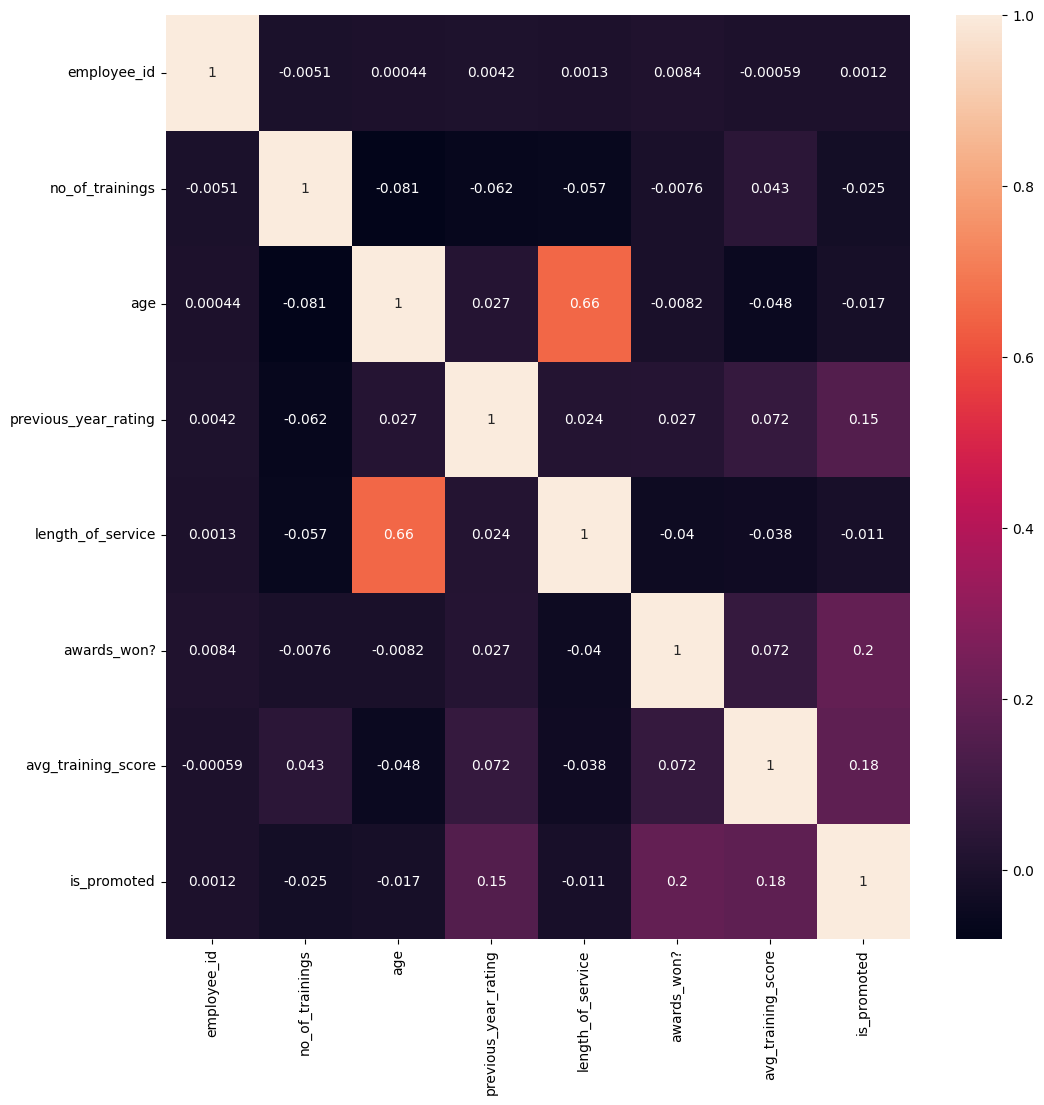

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)
plt.show()

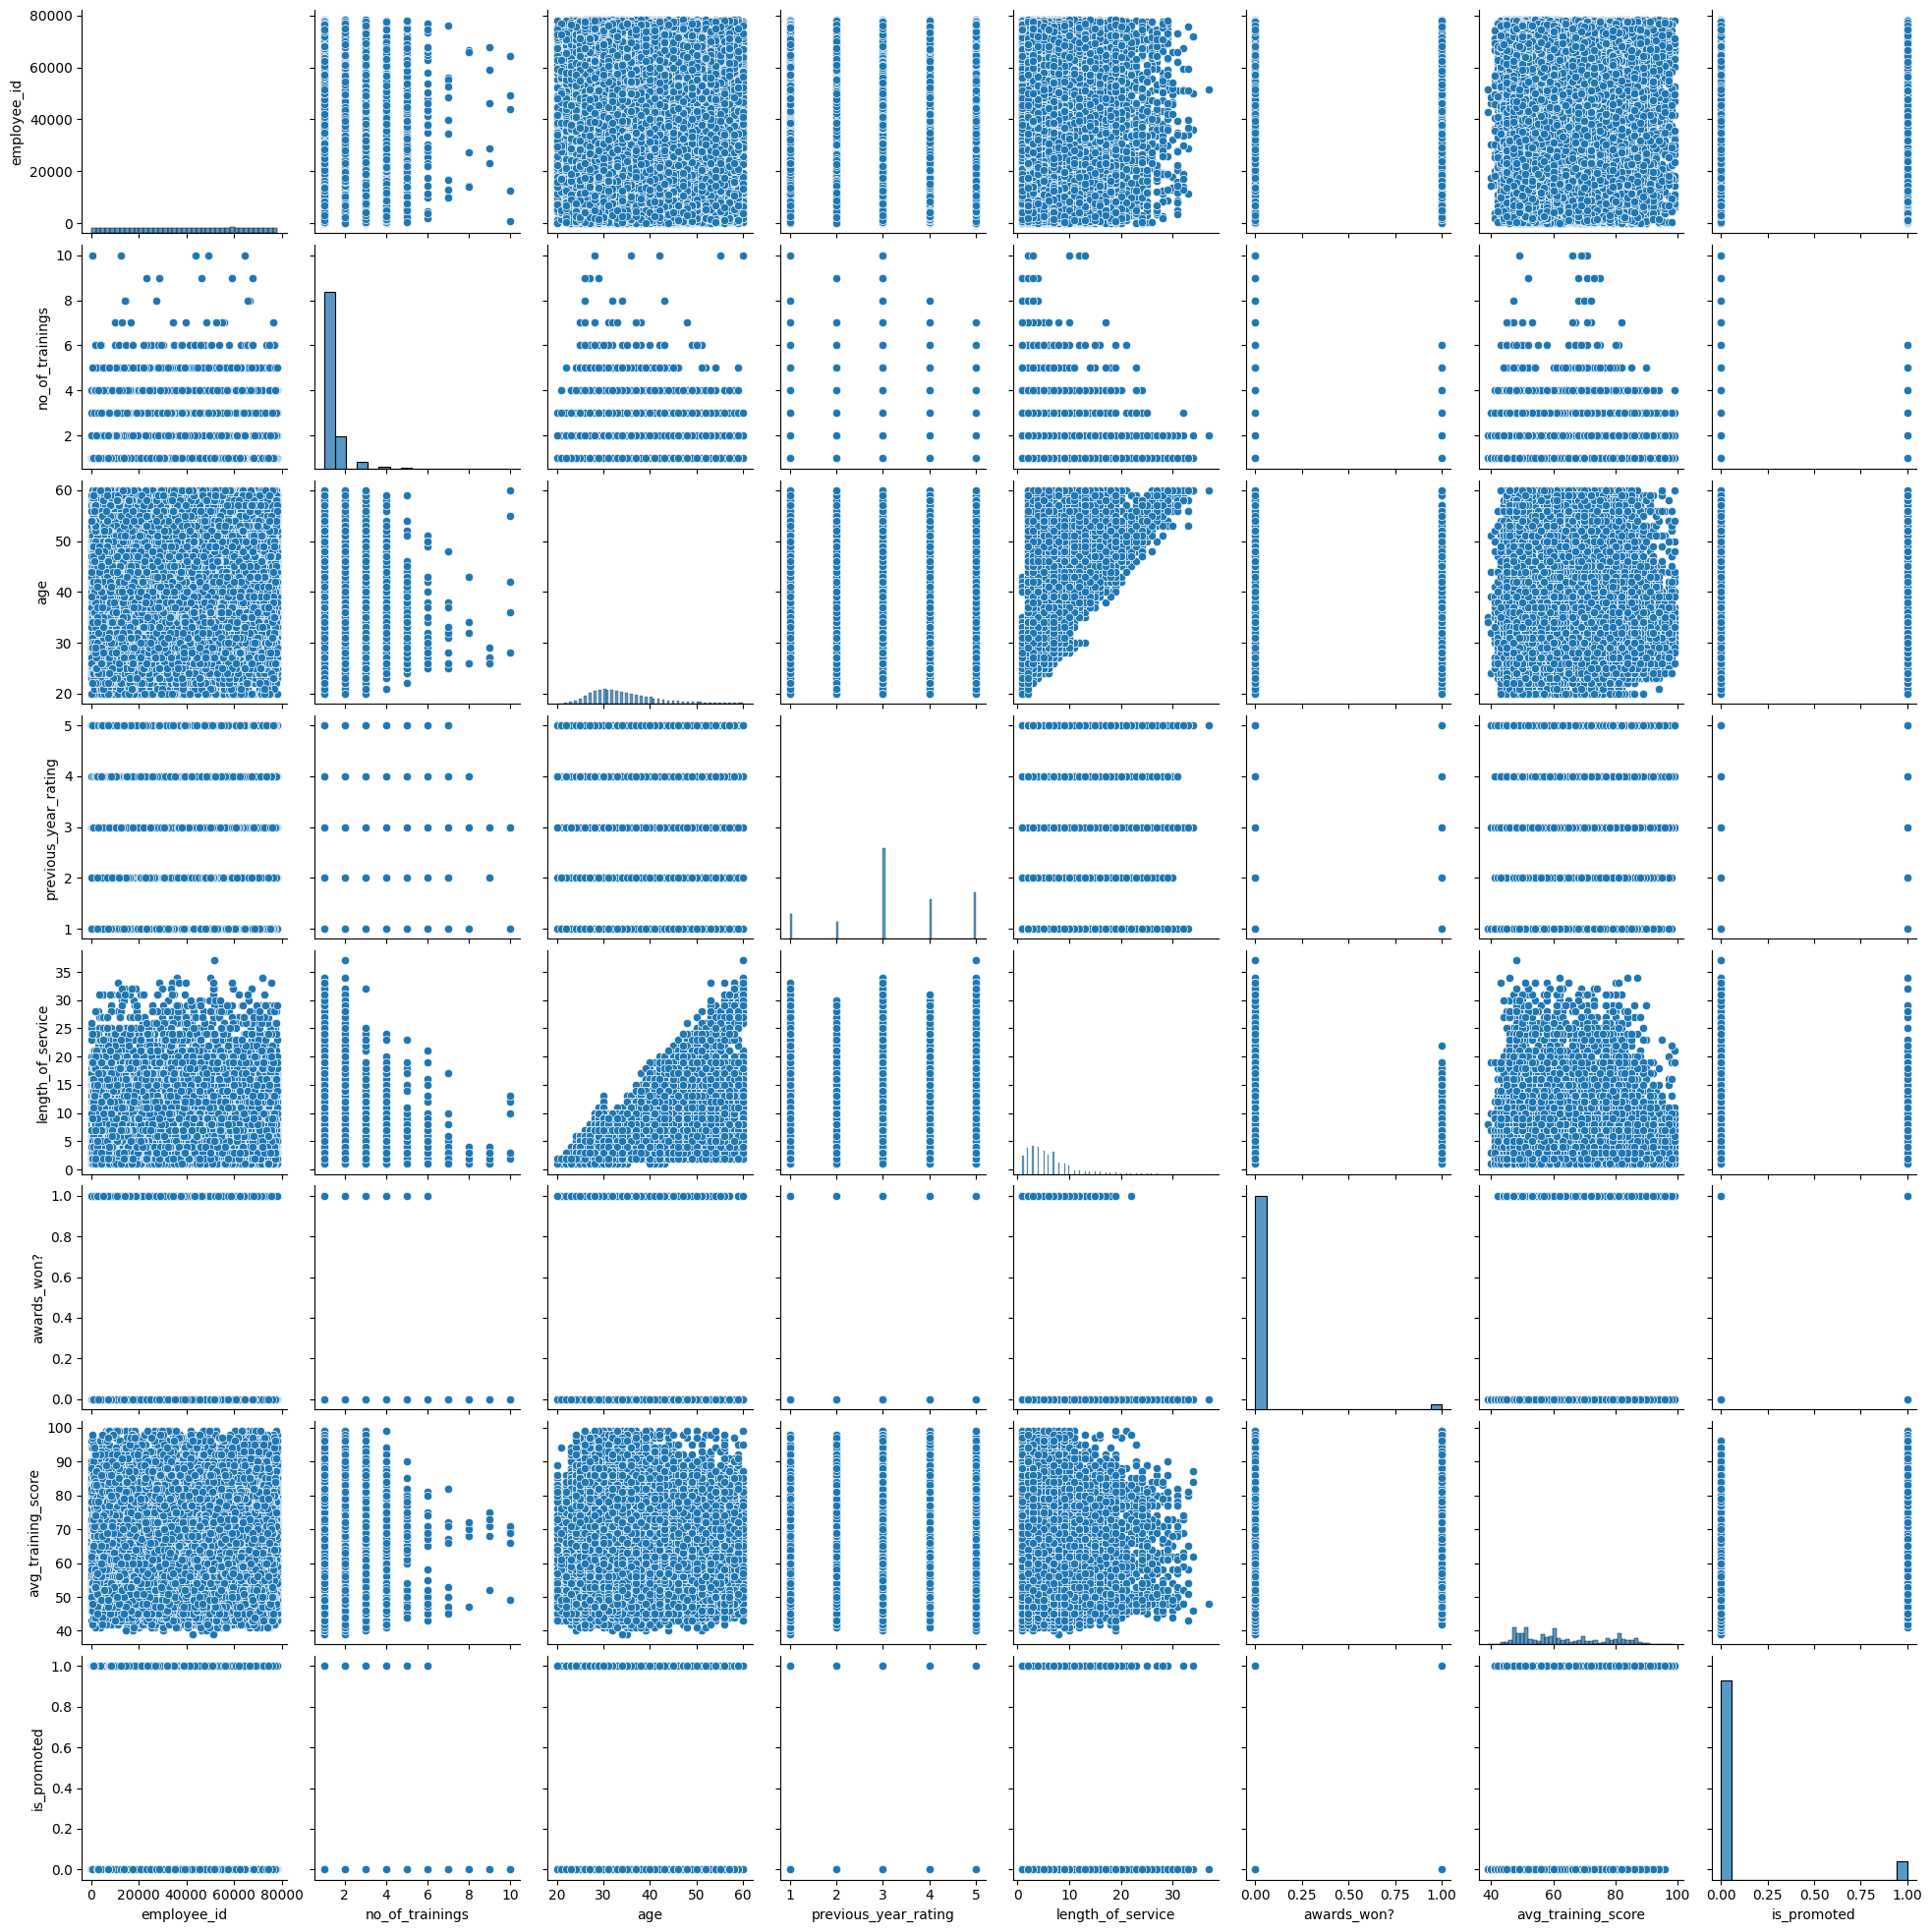

In [ ]:
sns.pairplot(data)
plt.show()

Q1. DOES THE OLDER EMPLOYEES GETTING MORE PROMOTION THAN YOUNGER EMPLOYEES?

In [ ]:
promoted=data.drop(data[data['is_promoted']==0].index)
promoted

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
11,49017,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,35,5.0,3,0,50,1
39,58304,Sales & Marketing,region_28,Bachelor's,m,sourcing,1,33,5.0,6,0,51,1
60,17673,Sales & Marketing,region_4,Master's & above,m,other,1,50,4.0,17,0,47,1
66,77981,Finance,region_22,Bachelor's,m,other,1,27,3.0,1,1,58,1
67,16502,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,27,3.0,1,0,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,3.0,1,0,56,1
54757,14502,Technology,region_7,Master's & above,m,other,1,54,4.0,7,0,81,1
54761,8278,Procurement,region_13,Bachelor's,f,sourcing,1,30,4.0,2,0,86,1
54792,994,Sales & Marketing,region_14,Bachelor's,m,other,1,59,3.0,11,0,65,1


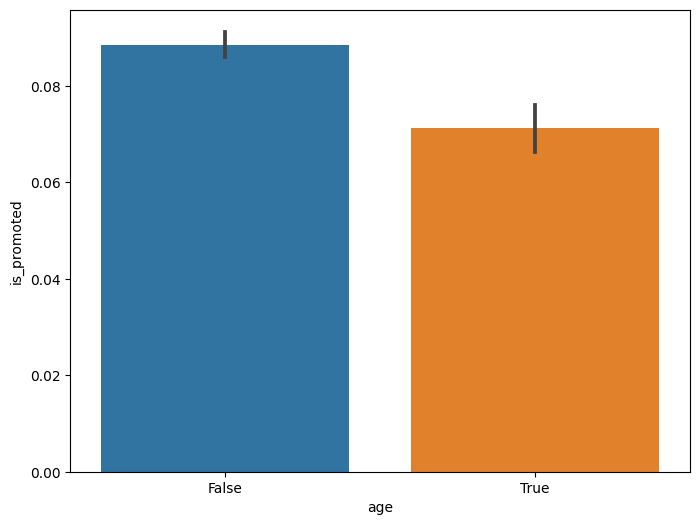

In [ ]:
#plt.figure(figsize=(8,6))
#sns.barplot(data['age']>40,data['is_promoted'])
#plt.show()
plt.figure(figsize=(8, 6))
sns.barplot(x=(data['age'] > 40), y=data['is_promoted'])
plt.show()

From the above graph we can say that older employees are not getting more promotions than
younger employees considering age greater than 40 as older employees

Q2. WHAT IS THE PROBABILITY TO GET PROMOTED, IF AN EMPLOYEED HAS WON AN AWARD?

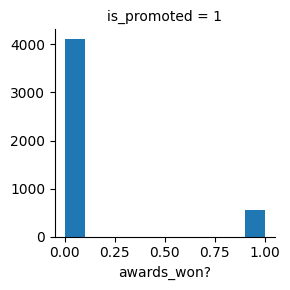

In [ ]:
g=sns.FacetGrid(data=promoted,col='is_promoted')
g.map(plt.hist,'awards_won?')

In [ ]:
data['awards_won?'].value_counts()


0    53538
1     1270
Name: awards_won?, dtype: int64

In [ ]:
promoted['awards_won?'].value_counts()

0    4109
1     559
Name: awards_won?, dtype: int64

In [ ]:
p_1=559/1270
print(p_1)

0.4401574803149606


If the employee got an award the probability of getting promotion is 0.44

Q3. WHAT IS THE AVERAGE TRAINING SCORE OF THOSE EMPLOYEEES WHO GOT PROMOTION?

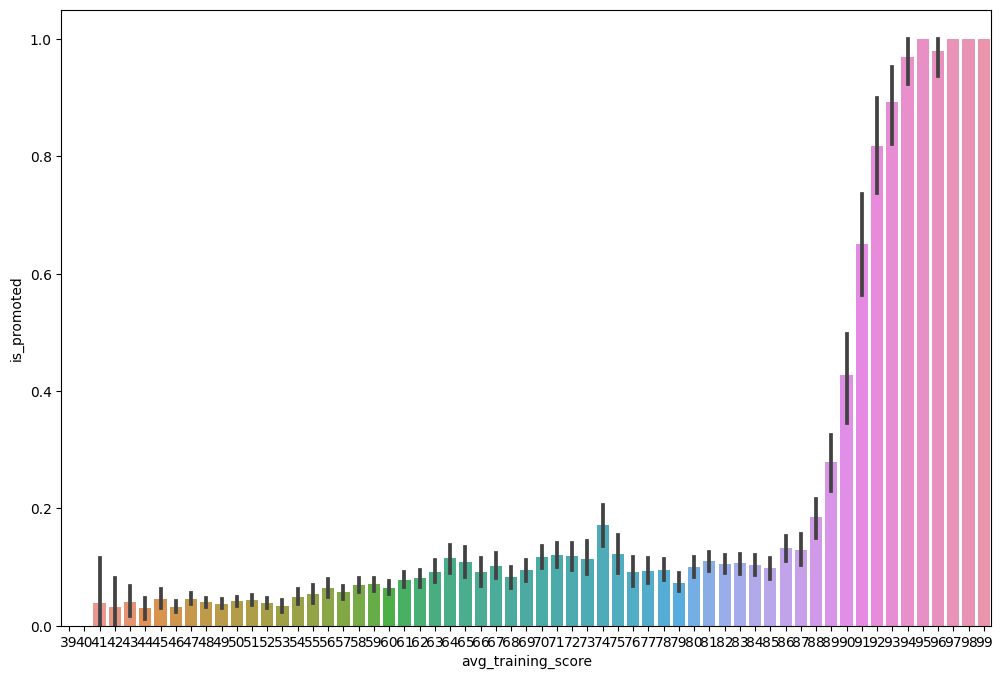

In [ ]:
plt.figure(figsize=(12, 8))  # Adjusted width and height in the figsize tuple
sns.barplot(x=data['avg_training_score'], y=data['is_promoted'])
plt.show()
#plt.ylabel('Promotion Status')
#plt.title('Bar Plot of Average Training Score and Promotion Status')'''

In [ ]:
avg_tr_sr_mean=(sum(promoted['avg_training_score'].values))/len(promoted.index)
print(avg_tr_sr_mean)

71.32519280205655


Avg training score of promoted employees is 71.33

Q4. WHAT IS THE IMPACT OF GENDER IN PROMOTIONS

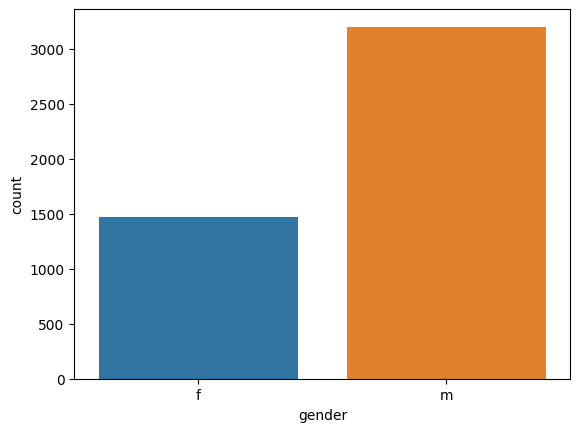

In [ ]:
sns.countplot(x='gender',data=promoted)
plt.show()

After seeing the above bar plot we can say that the male employees are getting more promotions than female employees

Q5. WHAT IS THE PROBABILITY OF FRESHERS GETTING PROMOTED?

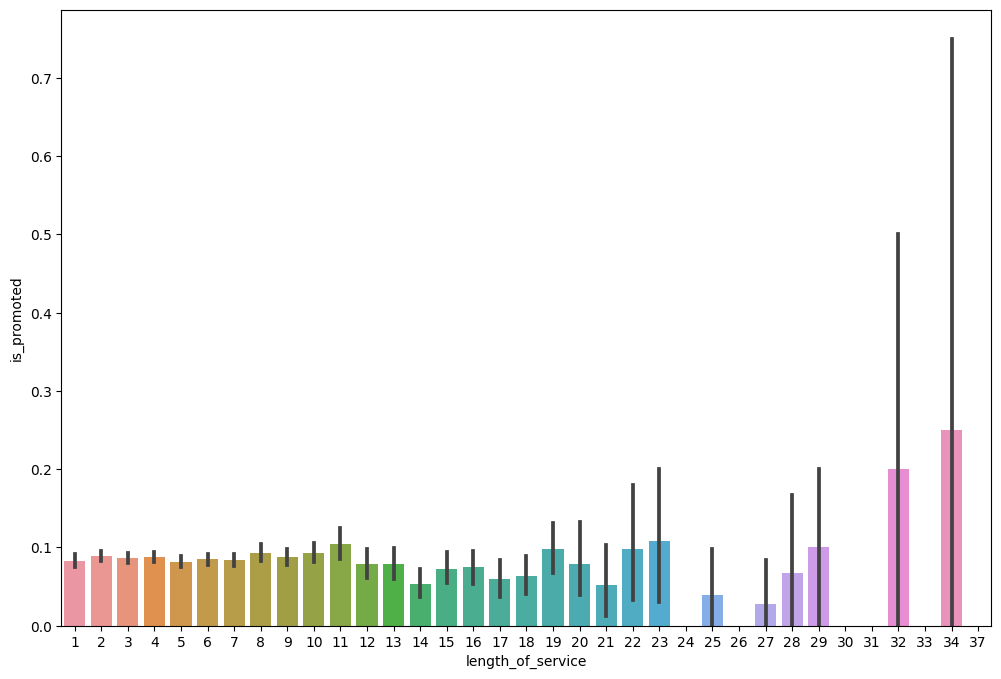

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='length_of_service', y='is_promoted', data=data)
plt.show()

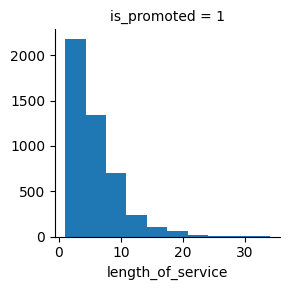

In [ ]:
g = sns.FacetGrid(data=promoted,col='is_promoted')
g.map(plt.hist,'length_of_service')


As per the above graph we can say that freshers getting promotions is
zero .Promotions are there after the length_of _service must be atleast one year.

OUTLIER TREATMENT

Lets check the ouliers are present or not using the boxploT.

*Outliers are only present in the continuous data

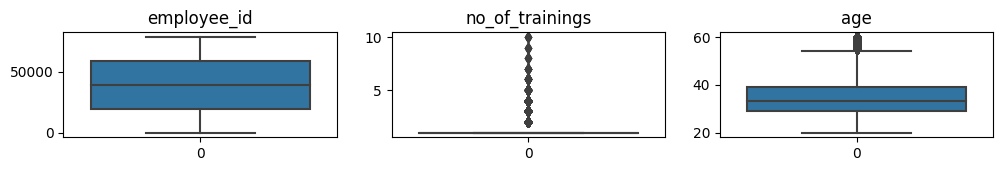

In [ ]:
#plt.title('BOXPLOT')
plt.figure(figsize=(12,3))

#boxplot for employee_id
plt.subplot(2,3,1)
sns.boxplot(data['employee_id'])
plt.title('employee_id')

#boxplot for no_of_trainings
plt.subplot(2,3,2)
sns.boxplot(data['no_of_trainings'])
plt.title('no_of_trainings')

#boxplot for age
plt.subplot(2,3,3)
sns.boxplot(data['age'])
plt.title('age')
plt.show()

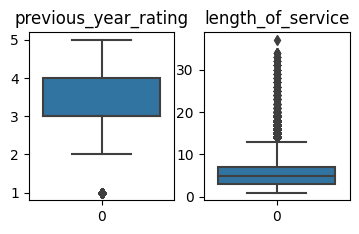

In [ ]:
#boxplot for previous_year_rating
plt.subplot(2,3,4)
sns.boxplot(data['previous_year_rating'])
plt.title('previous_year_rating')

#boxplot for length_of_service
plt.subplot(2,3,5)
sns.boxplot(data['length_of_service'])
plt.title('length_of_service')
plt.show()

* Columns in Dataset which have Outliers
- Average Training Score
- Length of Service.|

UNIVARIATE ANALYSIS

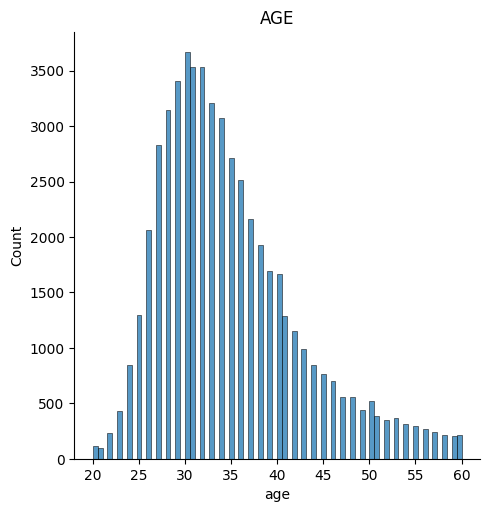

In [ ]:
sns.displot(data,x='age')
plt.title('AGE')
plt.show()

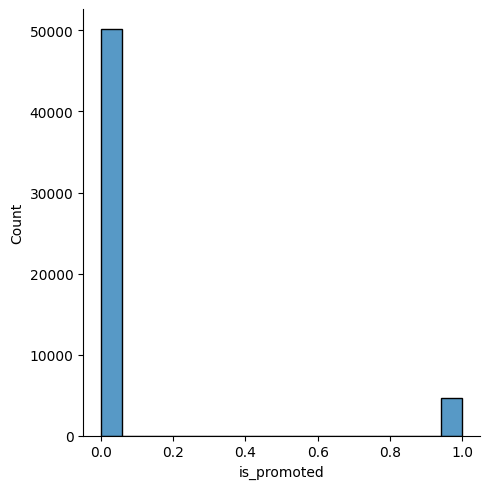

In [ ]:
sns.displot(data['is_promoted'])
plt.show()

<Axes: xlabel='is_promoted', ylabel='age'>

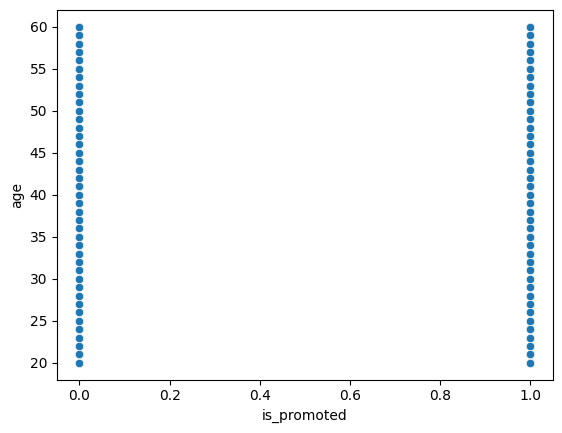

In [ ]:
#sns.scatterplot(data['is_promoted'],data['age'])
sns.scatterplot(x=data['is_promoted'], y=data['age'])

LABEL ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
d_type=dict(data.dtypes)
print(d_type)
for name,dtype in d_type.items():
  if str(dtype)=='object':
    print('<----',name,'-------->')
    print()
    print(data[name].value_counts())
    print()

{'employee_id': dtype('int64'), 'department': dtype('O'), 'region': dtype('O'), 'education': dtype('O'), 'gender': dtype('O'), 'recruitment_channel': dtype('O'), 'no_of_trainings': dtype('int64'), 'age': dtype('int64'), 'previous_year_rating': dtype('float64'), 'length_of_service': dtype('int64'), 'awards_won?': dtype('int64'), 'avg_training_score': dtype('int64'), 'is_promoted': dtype('int64')}
<---- department -------->

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

<---- region -------->

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_3

*Lets do label Encoding for education,gender,recruitment_channel

In [ ]:
col=['education','gender','recruitment_channel']
for name in col:
  data[name]=le.fit_transform(data[name])

In [ ]:
#Now lets see whether the attributes labelled or not
d_type=dict(data.dtypes)

for name,dtype in d_type.items():
  if str(dtype)=='object':
    print('<----',name,'-------->')
    print()
    print(data[name].value_counts())
    print()

<---- department -------->

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

<---- region -------->

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64


* Now we left with two columns with categorical data

ONE-HOT-ENCODING

In [ ]:
#use the pandas library to create dummy variables and drop the one column
dum_1=pd.get_dummies(data['department'], drop_first=True)

#using concat function add dum_1 to data
data=pd.concat([data,dum_1],axis=1)

#remove the original column from the data using drop function
data=data.drop(['department'],axis=1)

In [ ]:
#Lets remove the employee_id column there is no use of that columns
data=data.drop(['employee_id'],axis=1)

In [ ]:
#Encode for region column
dum_2=pd.get_dummies(data['region'],drop_first=True)

#concat dum_2 and data using pandas
data=pd.concat([data,dum_2],axis=1)

#Now remove the region column from the data
data=data.drop(['region'],axis=1)

In [ ]:
data

,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
0,2,0,2,1,35,5.0,8,0,49,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,1,30,5.0,4,0,60,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2,1,34,3.0,7,0,50,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,2,39,1.0,10,0,50,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,45,3.0,2,0,73,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,0,1,2,1,48,3.0,17,0,78,0,...,0,0,0,0,0,0,0,0,0,0
54804,2,0,0,1,37,2.0,6,0,56,0,...,0,0,0,0,0,0,0,0,0,0
54805,0,1,0,1,27,5.0,3,0,79,0,...,0,0,0,0,0,0,0,0,0,0
54806,0,1,2,1,29,1.0,2,0,45,0,...,0,0,0,0,0,0,0,0,0,1


* Now we have done the data cleaning part then lets go for Exploratory data analysis(EDA)

SPLIT THE DATA INTO TEST AND TRAIN DATA

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
remaining_col=list(data.columns)
#print(remaining_col)
remaining_col.remove("is_promoted")

In [ ]:
X=data[remaining_col]
Y=data.pop('is_promoted')

In [ ]:
#Lets start the splitting data
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2,random_state=1)

In [ ]:
(X_train.shape,X_test.shape)

((43846, 50), (10962, 50))

In [ ]:
(Y_train.shape,Y_test.shape)

((43846,), (10962,))

FEATURE SCALING

In [ ]:
#IMPORT REQUIRED LIBRARY
from sklearn.preprocessing import StandardScaler
se=StandardScaler()

In [ ]:
X_train_se = pd.DataFrame(se.fit_transform(X_train),columns=data.columns)
X_test_se = pd.DataFrame(se.fit_transform(X_test),columns=data.columns)

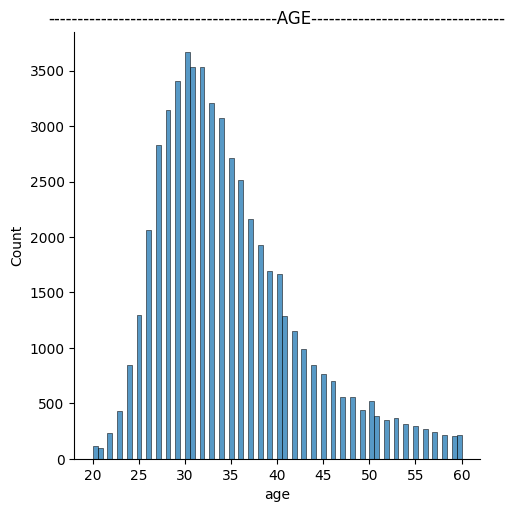

In [ ]:
#Let's check whether the data is normalized or not
sns.displot(data['age'])
plt.title("---------------------------------------AGE---------------------------------")
plt.show()

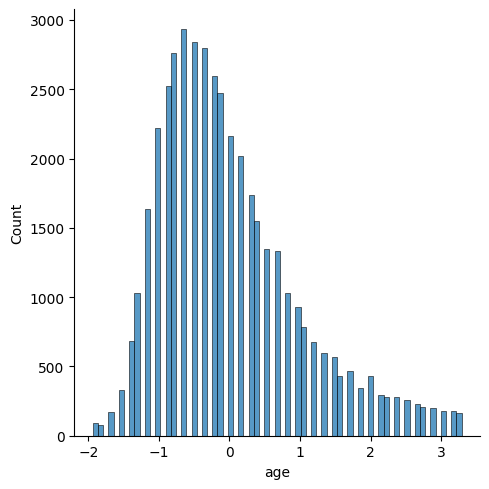

In [ ]:
sns.displot(X_train_se['age'])
plt.show() #after standardisation

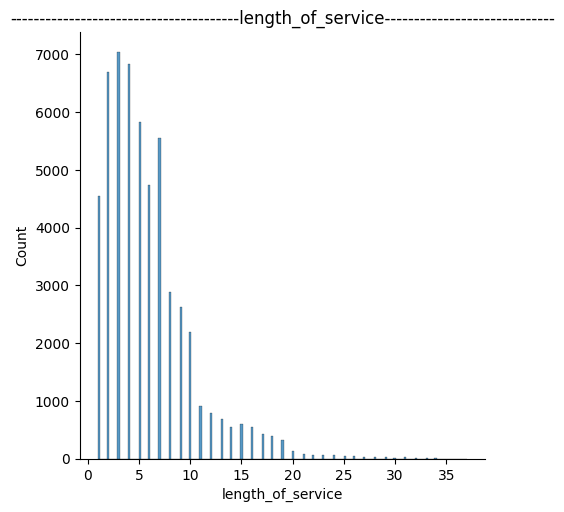

In [ ]:
#Let's check whether the data is normalized or not
sns.displot(data['length_of_service'])
plt.title("---------------------------------------length_of_service-----------------------------")
plt.show()

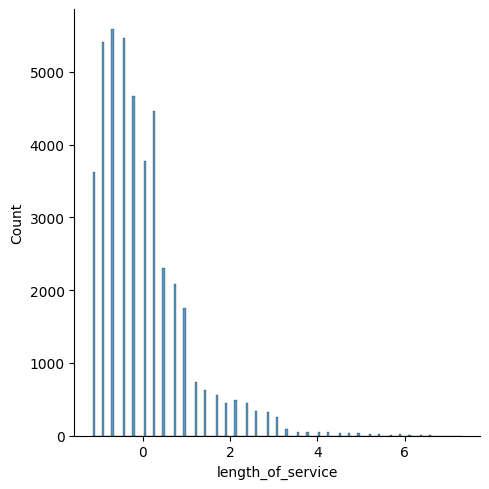

In [ ]:
sns.displot(X_train_se['length_of_service'])
plt.show()

PRINCIPAL COMPONENT ANALYSIS

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_se)
X_test_pca = pca.fit_transform(X_test_se)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [ ]:
model.fit(X_train_pca,Y_train)


LogisticRegression()

In [ ]:

model.intercept_


array([-2.95285444])

In [ ]:
model.coef_

array([[ 1.89143224e-01, -2.78809029e-01, -1.33836268e-01,
        -1.58669818e-01,  1.19446338e-01,  1.41771526e-01,
        -3.07833999e-01,  1.70799095e-01,  5.95398369e-02,
        -1.57995150e-01,  2.91042204e-01,  1.65948648e-01,
         7.36421824e-02,  3.02455261e-01,  1.49182355e-01,
        -9.88658077e-02,  4.65941135e-02,  1.63223914e-02,
        -5.19394047e-03, -1.13320758e-01, -3.36068609e-02,
        -3.27105732e-02,  6.16948455e-02,  3.55543569e-02,
         2.05486605e-02,  3.91292686e-03,  4.10488001e-02,
        -6.86960769e-02, -5.50630928e-02,  1.01072147e-02,
         3.39097264e-03, -1.14038766e-01, -2.01159104e-02,
         1.52545816e-02, -2.25928058e-02,  3.46448020e-02,
         1.46289128e-01,  2.41900568e-01, -2.64144402e-02,
         3.60010121e-02, -6.58423929e-02, -1.94991774e-01,
        -2.20917889e-01, -3.41598302e-01, -2.32669895e-02,
        -1.33204049e-01, -3.14134297e-01,  6.61022022e-01,
         6.08967837e+00, -2.01212198e-01]])

In [ ]:
pred=model.predict(X_test_pca)

In [ ]:

Y.value_counts()


0    50140
1     4668
Name: is_promoted, dtype: int64

So we have an unbalanced data set .so we need to calculate the f1_score

METRICS

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [ ]:
print("accuracy_score:", accuracy_score(Y_test,pred)) #we should not only look into accuracy

accuracy_score: 0.9326765188834154


In [ ]:
print("precision:",precision_score(Y_test,pred))

precision: 0.8897338403041825


In [ ]:
print(confusion_matrix(Y_test,pred))

[[9990   29]
 [ 709  234]]


Without using PCA i got accuracy as 0.8 and f1_score is 0.08 and precision is 0.8

In [ ]:
def f1_score(precision,recall):
 return 2*(precision*recall)/(precision+recall)
print("f1_score:",f1_score(precision_score(Y_test,pred),recall_score(Y_test,pred)))

f1_score: 0.3880597014925373


LOAD THE TEST DATA

In [ ]:
test = pd.read_csv("test.csv")
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,70


DATA CLEANING FOR TEST DATA

In [ ]:
test.shape

(23490, 12)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  awards_won?           23490 non-null  int64  
 11  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 2.2+ MB


In [ ]:
test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,99.000000


NULL VALUES

In [ ]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
awards_won?                0
avg_training_score         0
dtype: int64

In [ ]:
#lets find percentage of null values
round(100*test.isnull().sum()/len(test.index))

employee_id             0.0
department              0.0
region                  0.0
education               4.0
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    8.0
length_of_service       0.0
awards_won?             0.0
avg_training_score      0.0
dtype: float64

So we just impute the values so that no null values in the data set

In [ ]:
#impute education and previous_year_rating columns with their statistics metrics
test['education'] = test['education'].fillna(test['education'].mode()[0])
#impute for the column previous_year_rating
test["previous_year_rating"] = test["previous_year_rating"].fillna(test["previous_year_rating"].mode()[0])

In [ ]:
test.isnull().sum() #SO there are no null values in the test data set


employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
dtype: int64

LABEL ENCODING

In [ ]:
#label encoding for categorical data
test_typ = dict(test.dtypes)
for names,types in test_typ.items():
 if str(types) == 'object':
  print("-------------",names,"-------------")
  print()
  print(test[names].value_counts())
  print("count of ",names,":",len(test[names]))
  print()

------------- department -------------

Sales & Marketing    7315
Operations           4764
Procurement          3020
Technology           3011
Analytics            2319
Finance              1091
HR                   1085
Legal                 445
R&D                   440
Name: department, dtype: int64
count of  department : 23490

------------- region -------------

region_2     5299
region_22    2739
region_7     1982
region_13    1167
region_15    1130
region_26    1011
region_31     844
region_4      775
region_27     710
region_28     595
region_16     590
region_11     571
region_23     516
region_32     433
region_29     414
region_19     410
region_17     361
region_14     350
region_5      342
region_25     337
region_20     326
region_6      298
region_30     273
region_8      269
region_10     269
region_1      238
region_24     219
region_12     215
region_9      180
region_21     179
region_34     155
region_3      147
region_33     126
region_18      20
Name: region, dty

In [ ]:
test_cols = ["gender","education","recruitment_channel"]
for name in test_cols:
 test[name] = le.fit_transform(test[name])

In [ ]:
#lets check whether they labelled or not
for names in test_cols:
 print("--------",names,"-----------")
 print()
 print(test[name].value_counts())
 print()


-------- gender -----------

0    13078
2     9961
1      451
Name: recruitment_channel, dtype: int64

-------- education -----------

0    13078
2     9961
1      451
Name: recruitment_channel, dtype: int64

-------- recruitment_channel -----------

0    13078
2     9961
1      451
Name: recruitment_channel, dtype: int64



ONE HOT ENCODER


In [ ]:
#Encode for region column
test_dum_1 = pd.get_dummies(test['department'],drop_first=True)
#print(test_dum_1)
#concat dum_2 and data using pandas
test = pd.concat([test,test_dum_1],axis=1)
#Now remove the region column from the data
test = test.drop(['department'],axis=1)

In [ ]:
#one hot encoding for region column
test_dum2 = pd.get_dummies(test["region"],drop_first=True)
#lets concat the test data and test_dum2
test = pd.concat([test,test_dum2],axis=1)
#Lets remove the original column of region from the test data
test = test.drop(['region'],axis=1)

In [ ]:
#lets remove the employee_id column
test = test.drop("employee_id",axis=1)

In [ ]:
test.shape

(23490, 50)

ALL THE CATEGORICAL VARIABLES ARE ENCODED

NORMALIZATION

In [ ]:
test_se = se.fit_transform(test)

PREDICT THE TEST DATA

In [ ]:
y_test_pred = model.predict(test_se)

In [ ]:
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
pred_test = pd.DataFrame(y_test_pred)
print(pred_test)

       0
0      0
1      0
2      0
3      0
4      0
...   ..
23485  0
23486  0
23487  0
23488  0
23489  0

[23490 rows x 1 columns]


In [ ]:
pred_test.value_counts()

0    23046
1      444
dtype: int64

CLASS WEIGHTS

In [ ]:
weight_1 = {0:8.5,1:91.5}

In [ ]:

model_1 = LogisticRegression(class_weight = weight_1)
model_1.fit(X_train_pca,Y_train)


LogisticRegression(class_weight={0: 8.5, 1: 91.5})

In [ ]:
Y_pred_1 = model_1.predict(X_test_pca)

In [ ]:
print("Acuuracy_score:",accuracy_score(Y_test,Y_pred_1))

Acuuracy_score: 0.7338989235540959


In [ ]:
print("Confusion_Matrix:",confusion_matrix(Y_test,Y_pred_1))

Confusion_Matrix: [[7481 2538]
 [ 379  564]]


In [ ]:
print("Recall_score:",recall_score(Y_test,Y_pred_1))


Recall_score: 0.5980911983032874


In [ ]:
print("precision:",precision_score(Y_test,Y_pred_1))

precision: 0.18181818181818182


In [ ]:
def f1_score(precision,recall):
 return 2*(precision*recall)/(precision+recall)
print("f1_score:",f1_score(precision_score(Y_test,Y_pred_1),recall_score(Y_test,Y_pred_1)))

f1_score: 0.27886279357231153


PREDICTING TARGET VALUES FOR TEST DATA

In [ ]:
Y_target = model_1.predict(test_se)


In [ ]:
pd.DataFrame(Y_target).value_counts()


0    19137
1     4353
dtype: int64

Finally we got the model_1 as our good model bcz we got f1_score=0.27

EXPORTING TRAIN DATA TO EXCEL

In [ ]:
#importing train data
GFG = pd.ExcelWriter('train_cleaned.xlsx')
data.to_excel(GFG, index = False)

GFG.save()

In [ ]:
#exporting test data
GFG = pd.ExcelWriter('test_cleaned.xlsx')
test.to_excel(GFG, index = False)
GFG.save()
